## Theme: Did Kobe Bryant have a "hot" hand in 2009 NBA Finals?

### First, let's load our data.

In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/openintro/kobe.csv'
url_content = requests.get(df_url, verify=False).content
kobe = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

kobe.head()

vs  game quarter  time                                        description  \
0  ORL     1       1  9:47            Kobe Bryant makes 4-foot two point shot   
1  ORL     1       1  9:07                          Kobe Bryant misses jumper   
2  ORL     1       1  8:11                   Kobe Bryant misses 7-foot jumper   
3  ORL     1       1  7:41  Kobe Bryant makes 16-foot jumper (Derek Fisher...   
4  ORL     1       1  7:03                    Kobe Bryant makes driving layup   

  basket  
0      H  
1      M  
2      M  
3      H  
4      H

#### The number of games played

In [4]:
print(kobe['game'].nunique())

5


#### Check if and which games went into overtime

In [5]:
print(kobe['quarter'].unique())

['1' '2' '3' '4' '1OT']


In [6]:
kobe[kobe['quarter'] == '1OT']

vs  game quarter  time                               description basket
53  ORL     2     1OT  4:13         Kobe Bryant misses 22-foot jumper      M
54  ORL     2     1OT  2:17  Kobe Bryant makes 11-foot two point shot      H
80  ORL     4     1OT  4:13          Kobe Bryant makes 11-foot jumper      H
81  ORL     4     1OT  3:32          Kobe Bryant makes 19-foot jumper      H
82  ORL     4     1OT  2:49         Kobe Bryant misses 10-foot jumper      M
83  ORL     4     1OT  1:58         Kobe Bryant misses 18-foot jumper      M
84  ORL     4     1OT  0:47         Kobe Bryant misses 15-foot jumper      M

#### View of the data

In [7]:
kobe

vs  game quarter     time  \
0    ORL     1       1     9:47   
1    ORL     1       1     9:07   
2    ORL     1       1     8:11   
3    ORL     1       1     7:41   
4    ORL     1       1     7:03   
..   ...   ...     ...      ...   
128  ORL     3       4     3:33   
129  ORL     3       4     2:02   
130  ORL     3       4  00:23.9   
131  ORL     3       4  00:06.9   
132  ORL     3       4  00:00.5   

                                           description basket  
0              Kobe Bryant makes 4-foot two point shot      H  
1                            Kobe Bryant misses jumper      M  
2                     Kobe Bryant misses 7-foot jumper      M  
3    Kobe Bryant makes 16-foot jumper (Derek Fisher...      H  
4                      Kobe Bryant makes driving layup      H  
..                                                 ...    ...  
128                        Bryant Layup Shot: Missed        M  
129                          Bryant 3pt Shot: Missed        M  
130                          Bryant 3pt Shot: Missed        M  
131                          Bryant 3pt Shot: Missed        M  
132                 Bryant Layup Shot: Made (31 PTS)        H  

[133 rows x 6 columns]

#### First, let's replace "1OT" with "5" for the quarter column to make sorting easier.

In [8]:
kobe['quarter'] = kobe['quarter'].replace('1OT', '5') 
kobe['quarter'] = kobe['quarter'].astype(int)

#### Then, we can sort the data by game and quarter in ascending orders

In [9]:
kobe.sort_values(by = ['game', 'quarter'], ascending = [True, True], ignore_index = True, inplace = True)  
# Note: time is already in descending order for each game and quarter, so we do not need to sort that one.
kobe

vs  game  quarter  time  \
0    ORL     1        1  9:47   
1    ORL     1        1  9:07   
2    ORL     1        1  8:11   
3    ORL     1        1  7:41   
4    ORL     1        1  7:03   
..   ...   ...      ...   ...   
128  ORL     5        4  6:22   
129  ORL     5        4  4:26   
130  ORL     5        4  3:12   
131  ORL     5        4  2:38   
132  ORL     5        4  2:06   

                                           description basket  
0              Kobe Bryant makes 4-foot two point shot      H  
1                            Kobe Bryant misses jumper      M  
2                     Kobe Bryant misses 7-foot jumper      M  
3    Kobe Bryant makes 16-foot jumper (Derek Fisher...      H  
4                      Kobe Bryant makes driving layup      H  
..                                                 ...    ...  
128                  Kobe Bryant misses 18-foot jumper      M  
129      Kobe Bryant misses 27-foot three point jumper      M  
130      Kobe Bryant misses 27-foot three point jumper      M  
131            Kobe Bryant makes 9-foot two point shot      H  
132                  Kobe Bryant misses 13-foot jumper      M  

[133 rows x 6 columns]

#### For this lab, we define the length of a shooting streak to be the *number of consecutive baskets made until a miss occurs*.
#### For example, in Game 1 Kobe had the following sequence of hits and misses from his nine shot attempts in the first quarter:

#### H M | M | H H M | M | M | M

In [10]:
kobe['basket'][0:9]

0    H
1    M
2    M
3    H
4    H
5    M
6    M
7    M
8    M
Name: basket, dtype: object

#### We will define a function which calculates the length of all shooting steaks

In [11]:
def calc_streak(x):
    all_shoots = list(x)
    streak, count = [], 0
    
    for shoot in all_shoots:
        if shoot == 'H':
            count += 1
        elif shoot == 'M':
            streak.append(count)
            count = 0
    
    # If the last shoot is a hit, make sure to append the last count to the streak list as well.
    if all_shoots[-1] == 'H':  
        streak.append(count)
        
    return streak  
    
kobe_streak = calc_streak(kobe['basket'])
print(kobe_streak)

[1, 0, 2, 0, 0, 0, 3, 2, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 1, 1, 0, 4, 1, 0, 1, 0, 1, 0, 1, 4, 3, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 3, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1]


#### Let's make a barblot of the lengths of all shooting streaks.

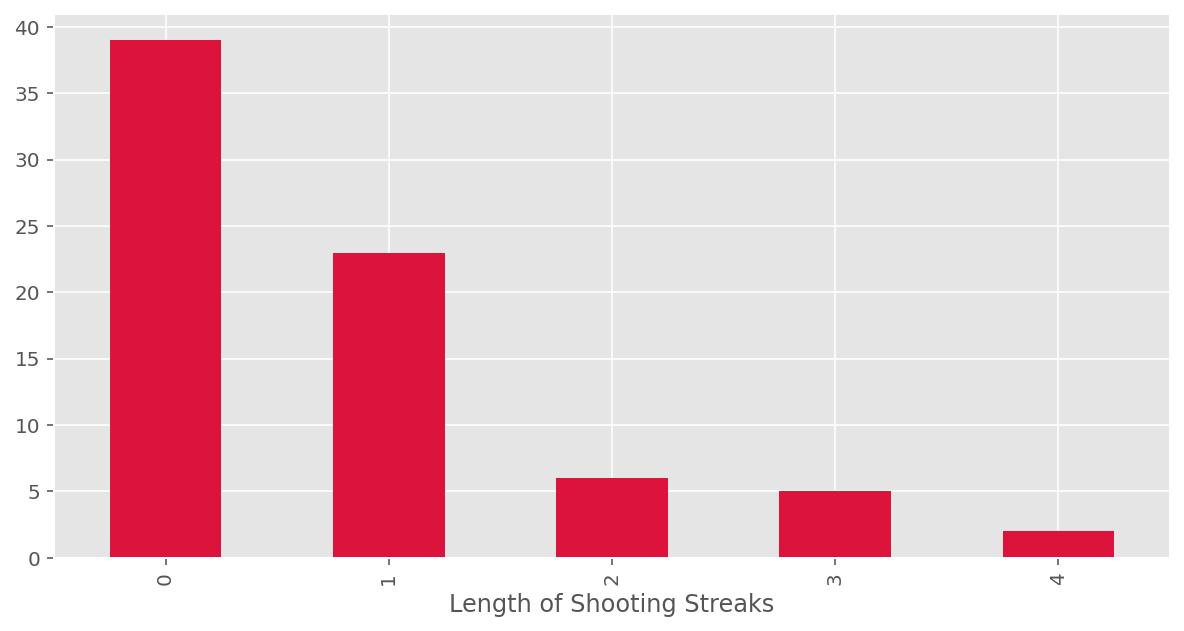

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

kobe_streak_counts = pd.Series(kobe_streak).value_counts().sort_index()

kobe_streak_counts.plot(kind = 'bar', color = 'crimson')
plt.xlabel('Length of Shooting Streaks')
plt.show(); 

#### We've shown that Kobe had some long shooting streaks, but are they long enough to support the belief that he had hot hands? What can we compare them to?

#### To answer these questions, let's return to the idea of independence. Two processes are independent if the outcome of one process doesn't effect the outcome of the second. If each shot that a player takes is an independent process, having made or missed your first shot will not affect the probability that you will make or miss your second shot.

#### A shooter with a hot hand will have shots that are not independent of one another. Specifically, if the shooter makes his first shot, the hot hand model says he will have a higher probability of making his second shot.

#### Let's suppose for a moment that the hot hand model is valid for Kobe. During his career, the percentage of time Kobe makes a basket (i.e. his shooting percentage) is about 45%, or in probability notation

#### P(shot 1 = H) = 0.45

#### If the shots are not intependent then we can say for example that P(shot 2 = H|shot 1 = H) = 0.60.

#### But if the shots are independent then it must be P(shot 2 = H|shot 1 = H) = 0.45




### Simulations in Python

In [13]:
import numpy as np

outcomes = np.array(['heads', 'tails'])
print(np.random.choice(outcomes))

tails


In [14]:
sim_fair_coin = np.random.choice(outcomes, size = 100, replace = True)

In [15]:
unique, counts = np.unique(sim_fair_coin, return_counts = True)
print(np.asarray((unique, counts)).T)

[['heads' '53']
 ['tails' '47']]


In [16]:
sim_unfair_coin = np.random.choice(outcomes, size = 100, replace = True, p = [0.2, 0.8])
unique, counts = np.unique(sim_unfair_coin, return_counts = True)
print(np.asarray((unique, counts)).T)

[['heads' '25']
 ['tails' '75']]


## Exercise: Create a random player (Independent Shooter) who has Kobe's shooting percentage (45%) and
## a) Make a bar plot of his shooting streak.
## b) Count every different length streak of Kobe's and The independent Shooter.
## c) Repeat the experiment 
## d) What are your thoughts of Kobe's shoots? (Independent or not)

### Simulating the Independent Shooter

#### Simulating a basketball player who has independent shots uses the same mechanism that we use to simulate a coin flip. To make a valid comparison between Kobe and our simulated independent shooter, we need to align both their shooting percentage and the number of attempted shots.

In [17]:
outcomes = np.array(['H', 'M'])
sim_basket = np.random.choice(outcomes, size = 133, replace = True, p = [0.45, 0.55])

In [18]:
print(np.array(kobe['basket']))

['H' 'M' 'M' 'H' 'H' 'M' 'M' 'M' 'M' 'H' 'H' 'H' 'M' 'H' 'H' 'M' 'M' 'H'
 'H' 'H' 'M' 'M' 'H' 'M' 'H' 'H' 'H' 'M' 'M' 'M' 'M' 'M' 'M' 'H' 'M' 'H'
 'M' 'M' 'H' 'H' 'H' 'H' 'M' 'H' 'M' 'M' 'H' 'M' 'M' 'H' 'M' 'M' 'H' 'M'
 'H' 'H' 'H' 'H' 'M' 'H' 'H' 'H' 'M' 'H' 'M' 'H' 'M' 'M' 'M' 'M' 'M' 'M'
 'H' 'M' 'H' 'M' 'M' 'M' 'M' 'H' 'H' 'M' 'M' 'H' 'M' 'H' 'H' 'M' 'H' 'M'
 'M' 'M' 'H' 'M' 'M' 'M' 'M' 'H' 'M' 'H' 'M' 'M' 'H' 'M' 'M' 'H' 'H' 'M'
 'M' 'M' 'M' 'H' 'H' 'H' 'M' 'M' 'H' 'M' 'M' 'H' 'M' 'H' 'H' 'M' 'H' 'M'
 'M' 'H' 'M' 'M' 'M' 'H' 'M']


In [19]:
print(sim_basket)

['M' 'M' 'H' 'M' 'M' 'H' 'H' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'H' 'H' 'M'
 'M' 'M' 'M' 'H' 'M' 'H' 'H' 'H' 'M' 'H' 'M' 'H' 'M' 'M' 'H' 'H' 'M' 'H'
 'M' 'H' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'H' 'H' 'H' 'H' 'H' 'M' 'H' 'H' 'M'
 'H' 'H' 'M' 'M' 'H' 'M' 'M' 'M' 'H' 'H' 'M' 'M' 'M' 'H' 'M' 'H' 'M' 'H'
 'M' 'M' 'M' 'M' 'M' 'M' 'H' 'H' 'M' 'H' 'H' 'H' 'M' 'H' 'H' 'M' 'H' 'H'
 'H' 'M' 'M' 'H' 'M' 'M' 'H' 'M' 'M' 'M' 'H' 'M' 'M' 'H' 'H' 'M' 'M' 'M'
 'M' 'H' 'H' 'H' 'M' 'H' 'H' 'H' 'H' 'M' 'H' 'M' 'M' 'H' 'H' 'M' 'H' 'M'
 'H' 'M' 'H' 'M' 'H' 'H' 'M']


### Compare the random player'streak with Kobe's

In [20]:
random_player_streak = calc_streak(sim_basket)
print(random_player_streak)

[0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 3, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 5, 2, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 3, 2, 3, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 3, 4, 1, 0, 2, 1, 1, 1, 2]


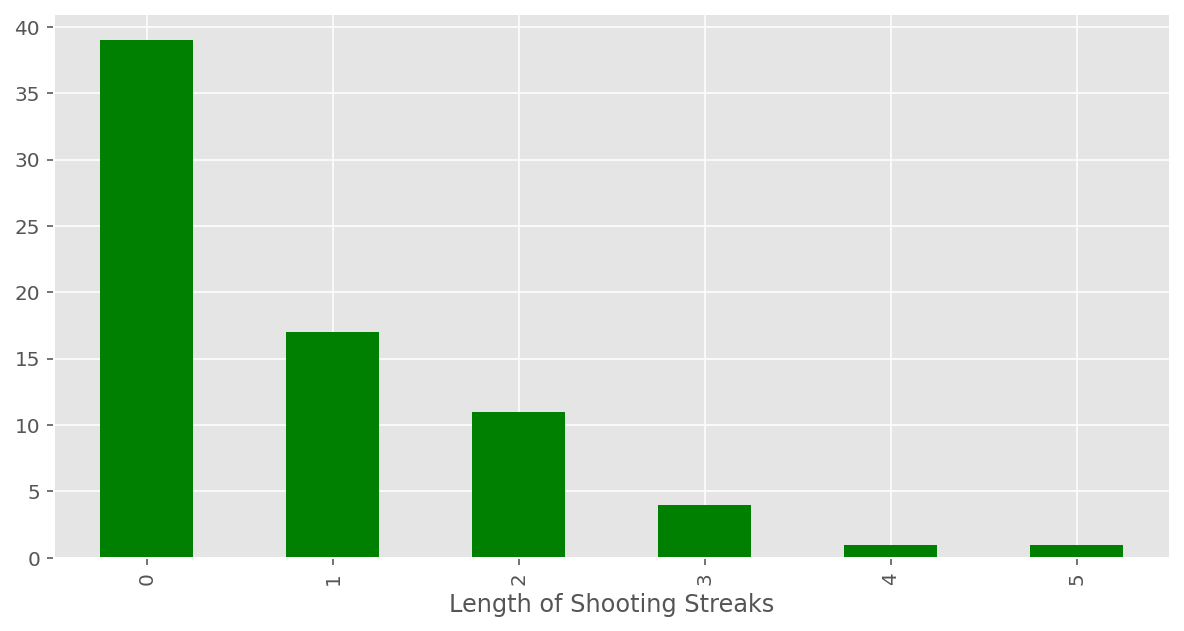

In [21]:
random_player_streak_counts = pd.Series(random_player_streak).value_counts().sort_index()

random_player_streak_counts.plot(kind = 'bar', color = 'green')
plt.xlabel('Length of Shooting Streaks')
plt.show(); 

In [34]:
print(random_player_streak_counts)

0    39
1    17
2    11
3     4
4     1
5     1
dtype: int64


In [29]:
print(kobe_streak_counts)

0    39
1    23
2     6
3     5
4     2
dtype: int64
